In [2]:
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
who

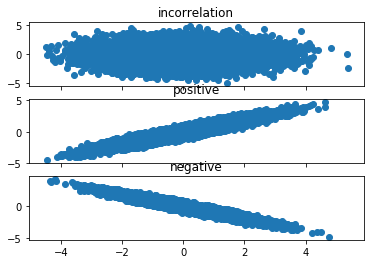

<Figure size 1800x6120 with 0 Axes>

In [17]:
%matplotlib inline
fig, ax = plt.subplots(3, 1, sharex=True)
plt.figure(dpi=360, figsize=(5, 17))
titles = ['incorrelation', 'positive', 'negative']
for i, d in enumerate([ic, pc, nc]):
    ax[i].scatter(d[:,0], d[:,1])
    ax[i].set_title(titles[i])

plt.show()

### linear scale range to [-5 +5]

In [10]:
range_ = [-5, 5]
newdata = []
for i, d in enumerate([ic, pc, nc]):
    maxmin = np.ceil(np.max(d, axis=0))-np.floor(np.min(d, axis=0))
    fac = np.divide(np.array([10, 10]), maxmin)
    l = np.full((d.shape[0], 1), fac[0])
    r = np.full((d.shape[0], 1), fac[1])
    facm = np.concatenate((l, r), axis=1)

    med = np.median(d, axis=0)
    l = np.full((d.shape[0], 1), med[0])
    r = np.full((d.shape[0], 1), med[1])
    medm = np.concatenate((l, r), axis=1)
    new = np.multiply(np.subtract(d, medm), facm)
    # np.median(new, axis=0)
    newdata.append(new)
    
ic, pc, nc = newdata

In [ ]:
np.max(nc, axis=0)

In [ ]:
np.median(nc, axis=0)

In [ ]:
np.min(nc, axis=0)

In [ ]:
import os

In [ ]:
os.getcwd()

### Save

In [12]:
np.savetxt('/Users/yangyou/Desktop/incorrelation.csv', ic, header='shape:(30000, 2) range:[-5, +5]', delimiter=',')

In [5]:
np.savetxt('/Users/yangyou/Desktop/negative.csv', nc, header='shape:(30000, 2) range:[-5, +5]', delimiter=',')

In [6]:
np.savetxt('/Users/yangyou/Desktop/positive.csv', pc, header='shape:(30000, 2) range:[-5, +5]', delimiter=',')

### usage

In [10]:
ic = np.loadtxt('./incorrelation.csv', delimiter=',')
pc = np.loadtxt('./positive.csv', delimiter=',')
nc = np.loadtxt('./negative.csv', delimiter=',')

In [9]:
who

DataGen	 da	 dg	 ic	 nc	 np	 pc	 plt	 


### show

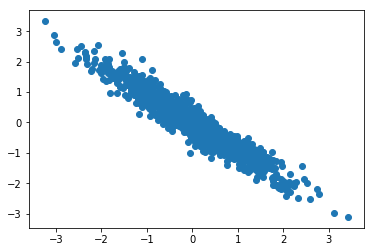

In [8]:
plt.scatter(ic[:1000, 0], ic[:1000, 1])
# plt.scatter(ic[1000:2000, 0], ic[1000:2000, 1], c='red')
plt.show()

In [5]:
np.random.shuffle(ic)

### generate data

In [1]:
from datagen import DataGen
dg = DataGen()
da = dg.gen(30000, 2, [[-5, 5], [-5, 5]])

In [3]:
da

array([[  9.02,   1.85],
       [  5.18, -11.32],
       [ -4.31,  -5.84],
       ...,
       [-14.12,   0.39],
       [-10.82, -10.45],
       [ -7.02,   2.94]])

In [4]:
da.shape

(30000, 2)

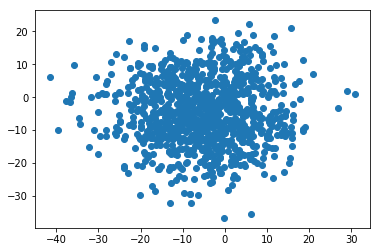

In [6]:
plt.scatter(da[:1000, 0], da[:1000, 1])
plt.show()

In [29]:
np.median(da, axis=0)

array([0.02, 0.  ])

In [15]:
np.max(ic, axis=0)

array([5.39047619, 4.92619048])

In [16]:
np.min(ic, axis=0)

array([-4.46785714, -4.96428571])

In [1]:
from computation import BNL

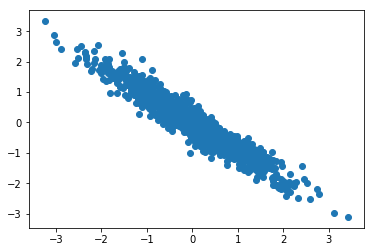

In [4]:
data = np.loadtxt('./negative.csv', delimiter=',')
plt.scatter(data[:1000, 0], data[:1000, 1])
# plt.scatter(ic[1000:2000, 0], ic[1000:2000, 1], c='red')
plt.show()


In [5]:
data.shape

(30000, 2)

In [14]:
skl = BNL(nc)

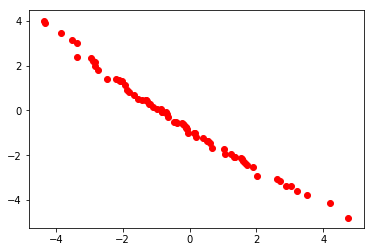

In [15]:
plt.scatter(skl[:, 0], skl[:, 1], c='red')
# plt.scatter(data[:1000, 0], data[:1000, 1])
plt.show()

In [16]:
skl.shape

(73, 2)

In [18]:
np.savetxt('./negative_skl.csv', skl, header='shape:(73, 2) range:[-5, +5]', delimiter=',')